#### Boot cell

Skip if `module_update.py` is in same folder as notebook, next cell downloads this file which in turn will download other files.

In [1]:
! curl -s "https://raw.githubusercontent.com/Yoonsen/Modules/master/module_update.py" > "module_update.py"

#### Get essentials

Import text and graph modules for analysis, and css for display

In [2]:
from module_update import update, css, code_toggle, printmd

In [3]:
css()

### Start med å importere modulene

In [4]:
update('graph_networkx_louvain', overwrite=True)
update('nbtext', overwrite=True)
import nbtext as nb
import graph_networkx_louvain as gnl
import networkx as nx
from graph_networkx_louvain import cutdown, make_collocation_graph
from collections import Counter

Updated file `C:\Users\larsj\Documents\GitHub\Miscellaneous-Notebooks\graph_networkx_louvain.py`

Updated file `C:\Users\larsj\Documents\GitHub\Miscellaneous-Notebooks\nbtext.py`

# Aggregerte data, trendlinjer og ordmodeller fra ngram




### unigram

Kommando `nb.unigram()` tar litt metadata (shift-tab).

Data inntil trigram.

In [7]:
masc_han = nb.unigram('han', period=(1900, 2000), gender ='m' )

In [8]:
fem_han = nb.unigram('han', period =(1900, 2000), gender = 'f')

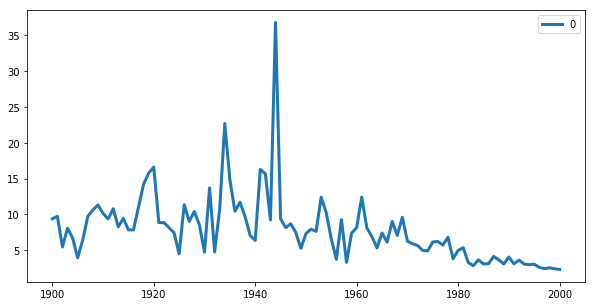

In [9]:
(masc_han/fem_han).plot(figsize=(10,5), lw=3)

In [10]:
masc_hun = nb.unigram('hun', period=(1900, 2000), gender ='m' )

In [11]:
fem_hun = nb.unigram('hun', period =(1900, 2000), gender = 'f')

Menn bruker 'hun' totalt mer enn kvinner (men det er flere menn, da)

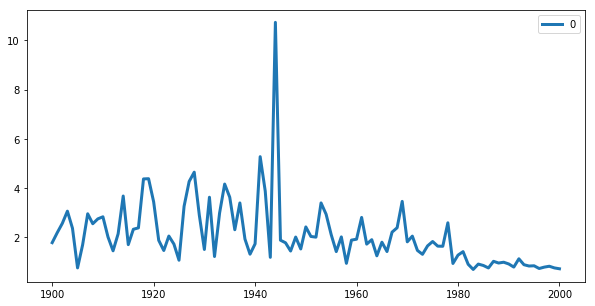

In [12]:
(masc_hun/fem_hun).plot(figsize=(10,5), lw=3)

Det kan se ut som kvinner bruker 'hun' mer enn menn gjør, sammenlignet med 'han'.

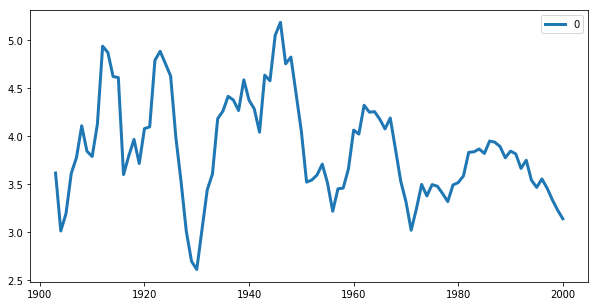

In [17]:
((masc_han/masc_hun)/(fem_han/fem_hun)).rolling(window=4).mean().plot(figsize=(10,5), lw=3)

# Korpusbygging

Ny kommando `book_urn()` og `refine_book_urn()` i tillegg til `best_book_urn()`. Alle med shift-tab-funksjonalitet.

In [19]:
urner = nb.book_urn(subject='religion', limit = 200)
urner[:10]

[[2007051104025, 'Schjelderup, Kristian', 'Lys i mørket', 1965],
 [2014091938005, 'Clément, Catherine', 'Theos reise', 2000],
 [2007071904003, 'Myklebust, Olav Guttorm', 'Vindu mot Afrika', 1971],
 [2007071801035, '', 'Vår kulturarv', 1971],
 [2009050704006, 'Steinsland, Gro', 'Voluspå', 1999],
 [2009032304062, 'Tornøe, Kirsten', 'Kan vi trøste hjertene?', 1996],
 [2009031104037, '', 'Fag for enhver smak?', 2000],
 [2010071508075, 'Løgstrup, K.E.', 'etiske fordring', 1999],
 [2014072308030,
  'Brøgger, Niels Chr.',
  'Helter og halvguder hos kelterne',
  1961],
 [2007111200017, 'Andersen, Øivind', 'Grunnsannheter til frelse', 1992]]

In [22]:
refine = nb.refine_book_urn(urns=urner, period=(1990, 1991))
refine

[[2007082301041, '', 'Snakk om det', 1990],
 [2009051304043, 'Hellern, Victor', 'Etikk og livssyn i samfunnslære', 1990],
 [2007082204007, 'Leirvik, Oddbjørn', 'Møte med islam', 1990],
 [2007082201035, 'Lande, Aasulv', 'Japans religionar', 1990],
 [2014060506042, '', 'Tro og bilde i Norden i reformasjonens århundre', 1991],
 [2015052709126,
  'Elgvin, Lilly-Anne Østtveit',
  'Plante på hjemlig jord',
  1991],
 [2008060900044, '', 'Skolen mot år 2000', 1991],
 [2009060804049, 'Alfsen, Liv Sødal', 'Hvem er han?', 1991],
 [2007080800067, '', 'Uoverstigelige grense', 1991]]

In [24]:
nb.best_book_urn(word='hestepasseren')

[[2009042104083, 'Campbell, Joanna', 'heldigste jenta i verden-', 2000],
 [2014031108158, 'MacDonald, George', 'Markiens hemmelighet', 1992],
 [2008110400079, 'Tingstad, Gunnvor', 'I grevens tid', 2001],
 [2014050705054, 'Stehn, Malin', 'ordentlig venn', 2011],
 [2012112808085, 'Godden, Jon', 'Ubudne gjester', 1975],
 [2009030404132, 'Mellberg, Mats', 'Hestehold i praksis', 1997],
 [2014070306021, 'Campbell, Joanna', 'Cindys nye start', 2009],
 [2013080838018, 'Ashley, Anne', 'Sarahs beskytter', 1999],
 [2014090438010, 'Proctor, Candice', 'Syndens hus ; Forbudte lengsler', 2011],
 [2011032108012, 'Campbell, Joanna', 'Cassidys dilemma', 2003],
 [2016072948112, 'Phillips, Michael', 'Arvingen til Stonewycke', 1989],
 [2014042406008, 'Hagmar, Pia', 'Saras vintersorg', 2006],
 [2014022708121, 'Raleigh, Deborah', 'Lady Biancas hevn', 2008],
 [2014081207045, 'Dixon, Rex', 'Pocomoto tar et krafttak', 1967],
 [2013040206016, 'Campbell, Joanna', 'stjerne faller', 2008],
 [2008011100033, 'Campbel

# Nye konk

Kommandoene er `urn_concordance()` og `concordance()` -- lurer på å droppe den siste til fordel for konk basert på URN.

In [26]:
urner = nb.book_urn()
nb.urn_concordance(word='likestilling', urns = urner)


"Brigaden i Nord-Norge 1953-1995, Lundesgaard, Leif, 1995",I 1984 ble full yrkesmessig,likestilling,mellom menn og kvinner i
"Brigaden i Nord-Norge 1953-1995, Lundesgaard, Leif, 1995",Det var således en full,likestilling,som ble vedtatt . Forsvarskomiteen
"Mellomfag, , 1995",på spørsmål om arbeidsdeling og,likestilling,har grunn til å mene


In [30]:
nb.concordance(word='likestilling', corpus='avis', yearfrom=1970, yearto = 1980)

jaerbladet-19710622,"var prating om slåttonn ,",likestilling,", kvinnelege prestar og om"
jaerbladet-19710914,. Om det skulle bli,likestilling,"mel lom kjønnene , ville"
jaerbladet-19710924,"eit positivt teikn , meir",likestilling,mellom kjønna . Elles vil
jaerbladet-19720908,York forleden for * fullkommen,likestilling,mellom kjønnene . Blant kravene
jaerbladet-19720908,"adgnng til arbeide , kjønnenes",likestilling,i skolene og i det
stavangeraftenblad-19730106,som nye signaler for større,likestilling,i arbeidslivet . Videre er
stavangeraftenblad-19730106,Kvinnekupp ga resultater partiprogram for,likestilling,blir fulgt med stor interesse
stavangeraftenblad-19730106,er ikke så opptatt av,likestilling,", fordi vi ikke ser"
stavangeraftenblad-19730110,. Rådmannen går inn for,likestilling,av de to linjene .
stavangeraftenblad-19730612,står også kravet om full,likestilling,"mellom kjønn , yrker og"
hamararbeiderblad-19730213,det reist krav om økt,likestilling,pa en rekke områder .


In [31]:
nb.concordance(word='likestilling', corpus='bok', yearfrom=1970, yearto = 1980)

"Monsen, Nina Karin,Jammersminne,1980",at du ikke var imot,likestilling,", men hvor nøye går"
"Monsen, Nina Karin,Jammersminne,1980",var gjennomsyret av likeverd og,likestilling,mellom mann og kvinne -
"Monsen, Nina Karin,Jammersminne,1980",sine livsløgner om likeverd og,likestilling,. Meninger er farlige når
",Norrøn litteratur og norske folkeviser,1972",kalt et aristodemokrati : prinsipiell,likestilling,og likhet for loven mellom
",Skipsmålingskonvensjonsutvalget av 1972,1975",har kommet frem til ved,likestilling,av nytt og eksisterende fartøy
"Holt, Lars Jakob,Studiehefte til Andenæs, Brøgger, Holte: Samfunnskunnskap for den videregående skolen allmenn studieretning,1977",Full,likestilling,på alle feiter reiser veldige
"Holt, Lars Jakob,Studiehefte til Andenæs, Brøgger, Holte: Samfunnskunnskap for den videregående skolen allmenn studieretning,1977",om større økonomisk utjevning og,likestilling,mellom befolkningsgruppene .
",Norges historie,1980","samme år , med formell",likestilling,mellom de
",Norges historie,1980",av 1825 gav nemlig full,likestilling,mellom norske og svenske skip
